#**Introdução**

No contexto hospitalar um do grandes problemas é a reinternação, ou seja, pacientes que recebem alta mas voltam ao hospital um tempo depois seja por complicações seja porque a condição não foi totalmente tratada.

Nesse projeto meu objetivo é analisar dados de pacientes e buscar o que leva à reinternação dos mesmos reduzindo assim custos hospitalares, tempo dos profissionais de saúde além de melhorar a qualidade de vida desses pacientes

**Objetivos:**
1. Explorar e entender os dados disponíveis.
2. Construir e comparar modelos preditivos para a reinternação hospitalar.
3. Avaliar a performance dos modelos utilizando métricas apropriadas.
4. Propor intervenções baseadas nos resultados do modelo

###Importação das Bibliotecas

In [24]:
# Importação de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

###Explorar arquivo

In [25]:
import pandas as pd
df = pd.read_csv('/content/hospital_readmissions.csv')
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


###Análise Exploratória

In [26]:
# Informações gerais sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

No conjunto de dados temos 16 colunas, 15 que podemos usar como as variáveis para a previsão e 1 que é o que queremos prever, a coluna readmitted. Não há dados faltantes

In [27]:
# Descrição estatística das variáveis numéricas
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


Com as estatísticas descritivas temos alguns achados como:

* o tempo máximo de hospitalização, que foi de 14 dias

* o número de procedimentos laboratoriais (em média foram 43, sendo que o máximo chegou a 113)

* a quantidade de procedimentos médicos, teve paciente que realizou 6 procedimentos

In [28]:
# Verificar a distribuição da variável alvo 'readmitted'
df['readmitted'].value_counts(normalize=True)

,proportion
readmitted,
no,0.52984
yes,0.47016


####Análise de Variáveis Numéricas

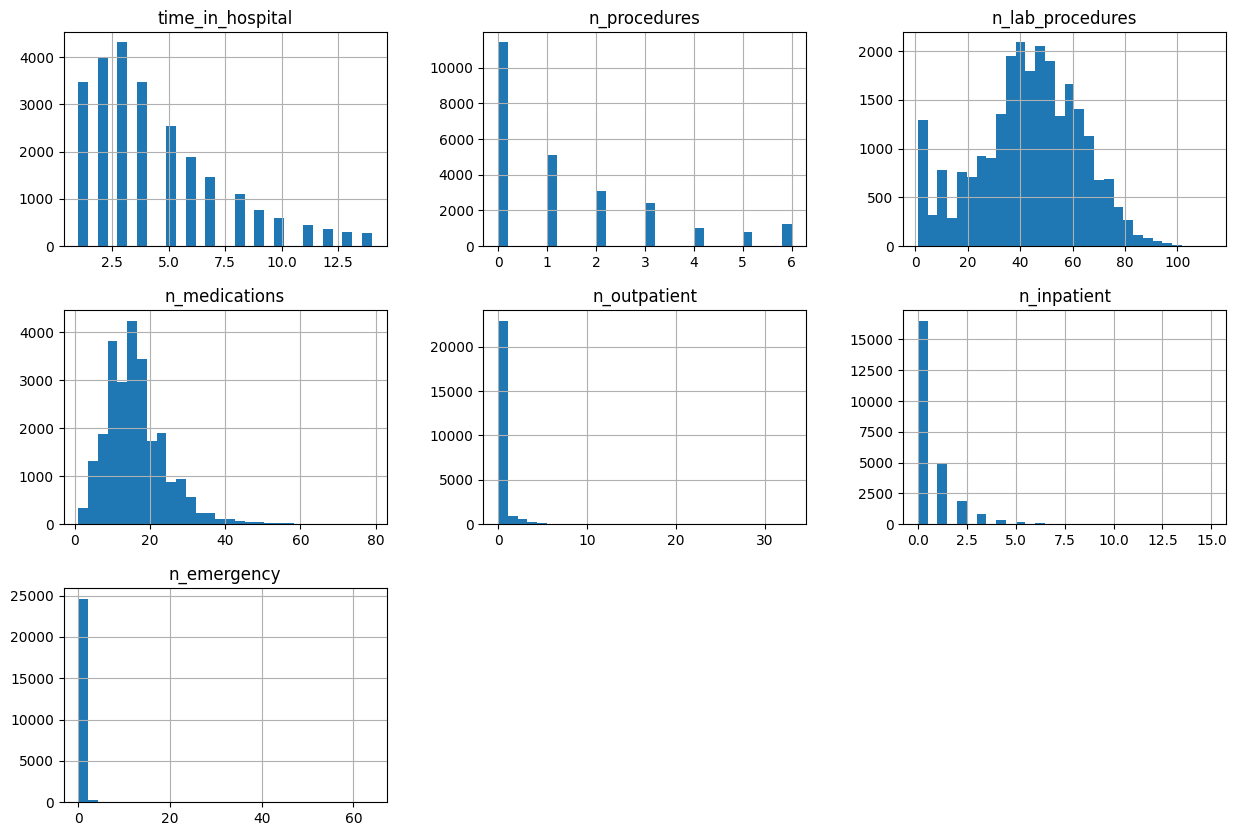

In [29]:
# Histogramas para variáveis numéricas
df[['time_in_hospital', 'n_procedures', 'n_lab_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']].hist(bins=30, figsize=(15, 10))
plt.show()

####Análise de Variáveis Categóricas

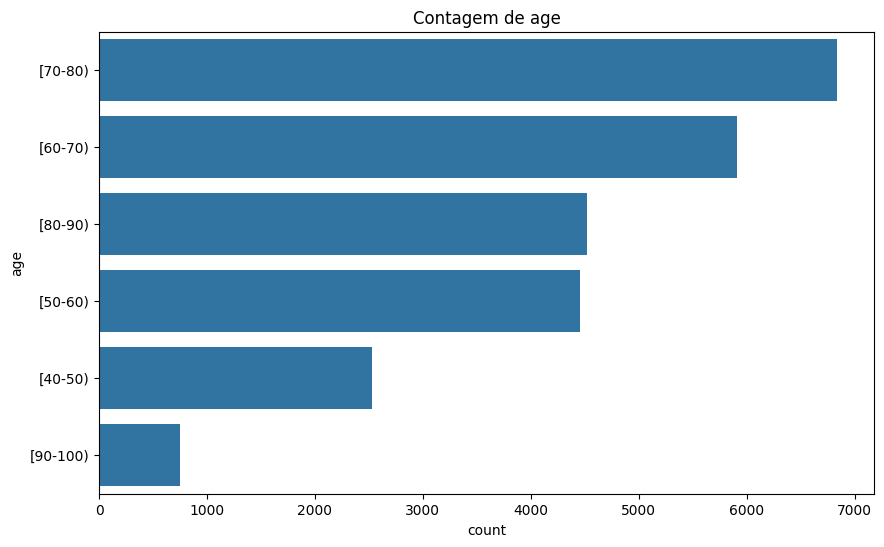

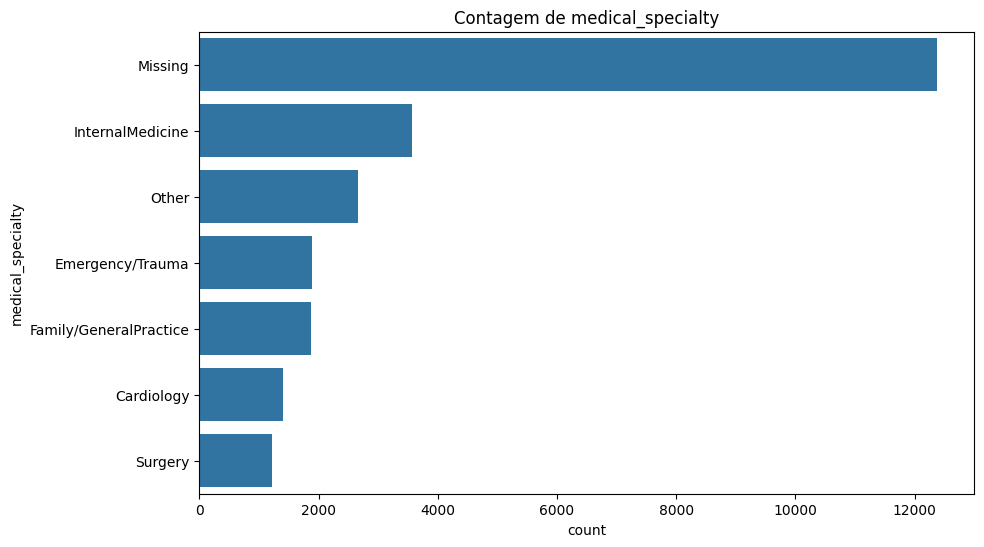

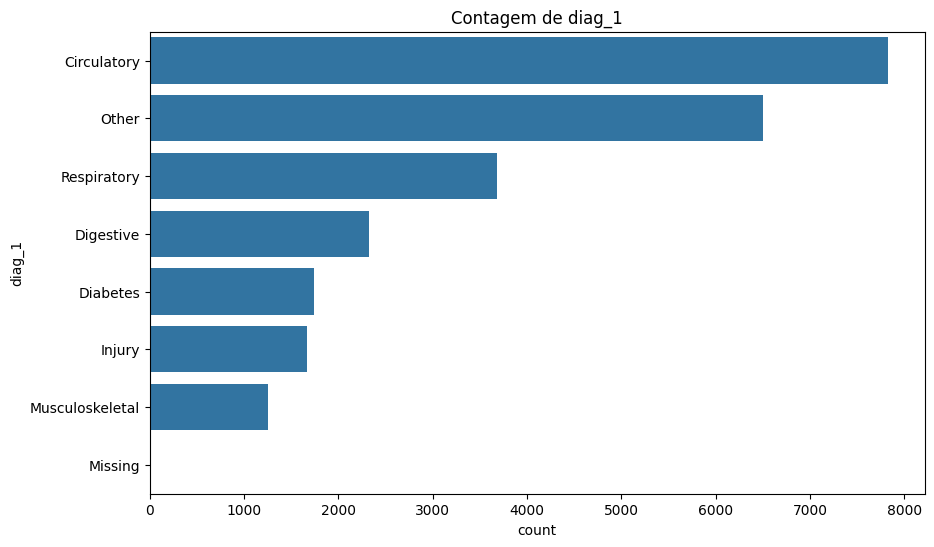

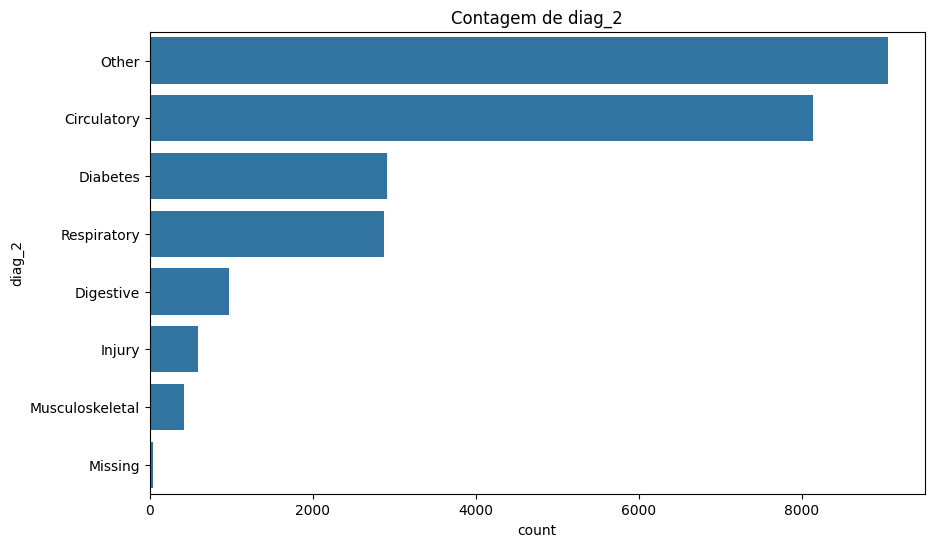

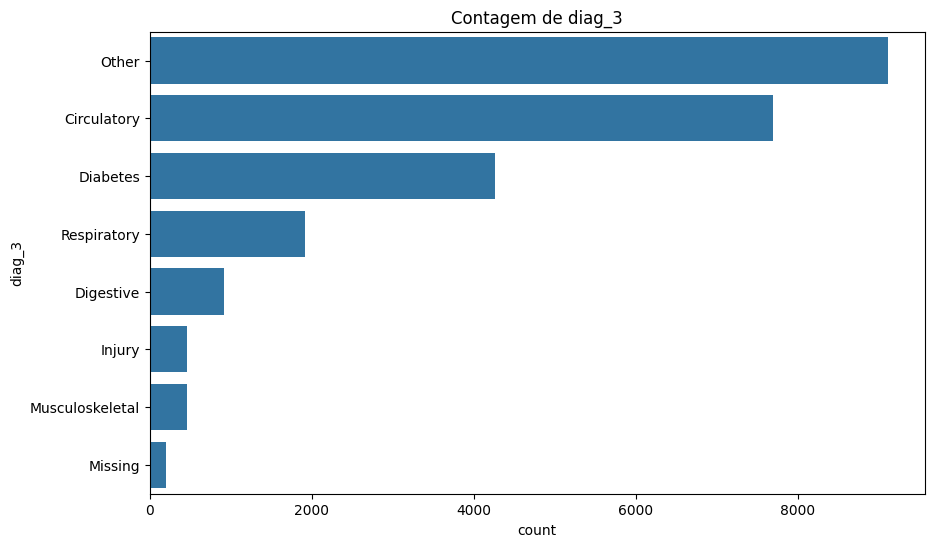

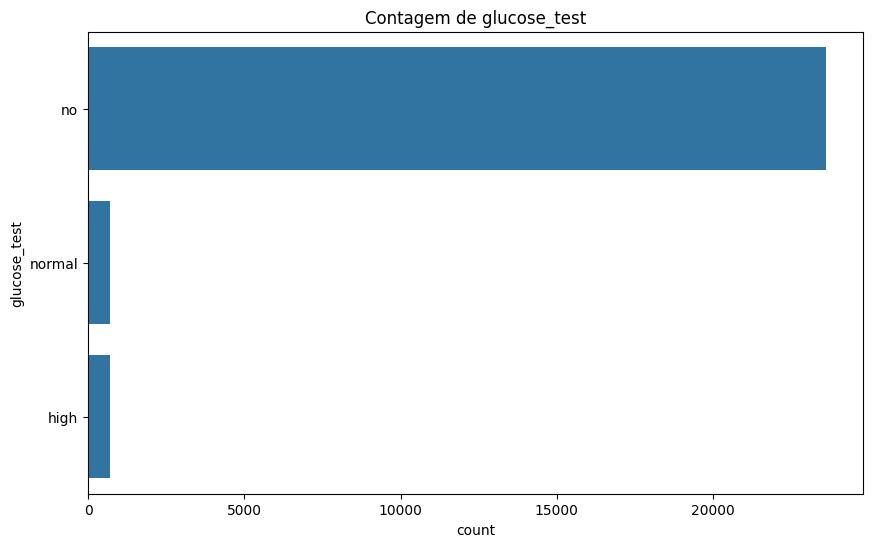

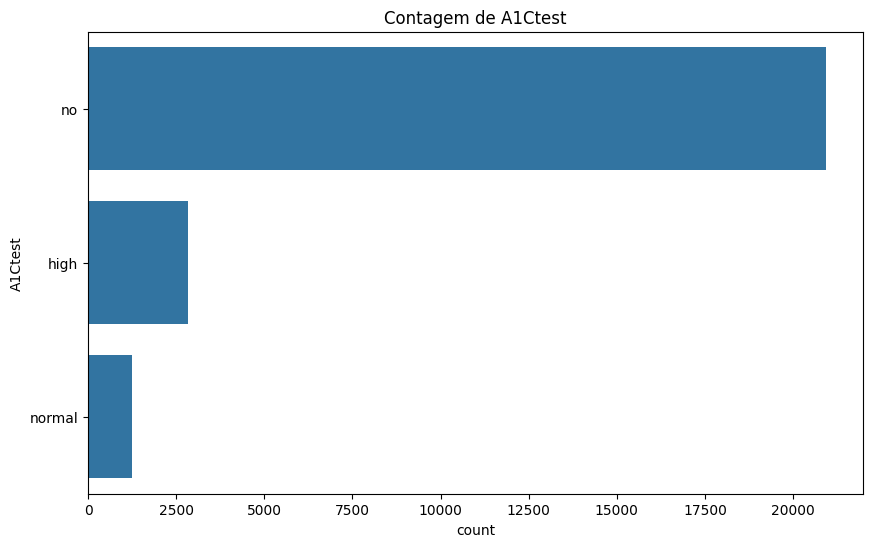

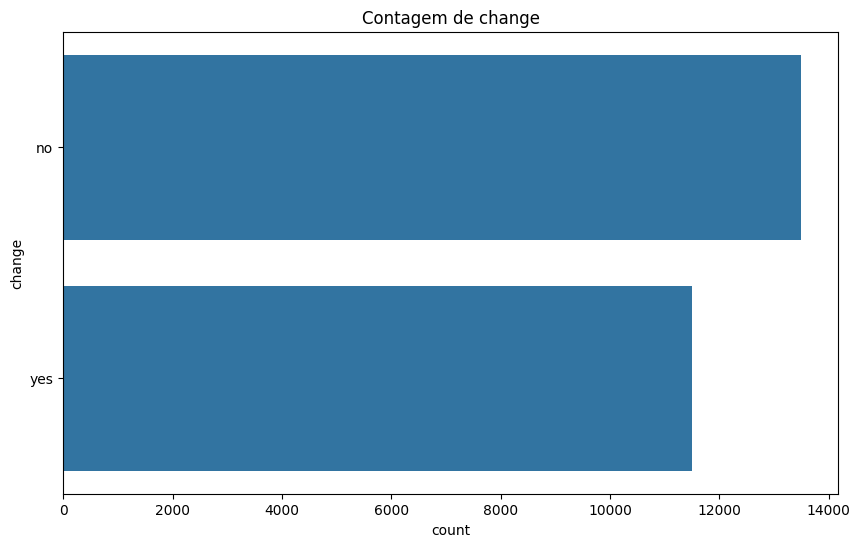

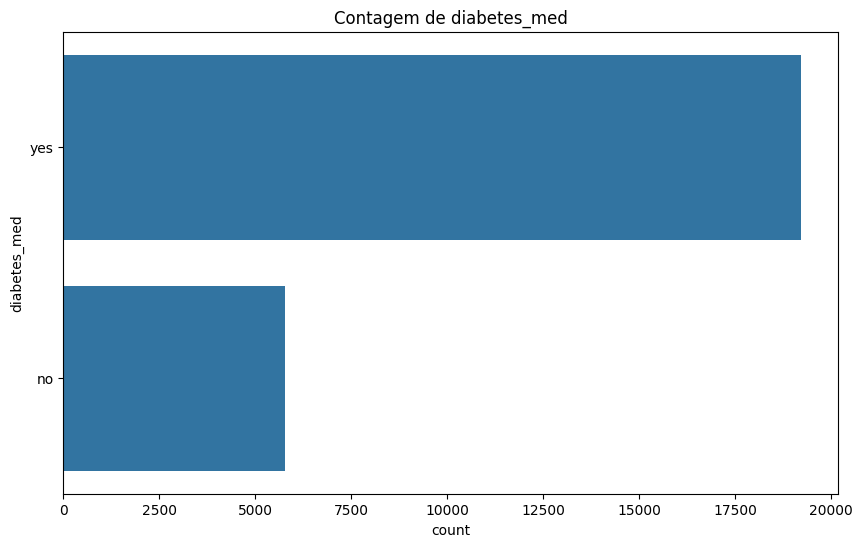

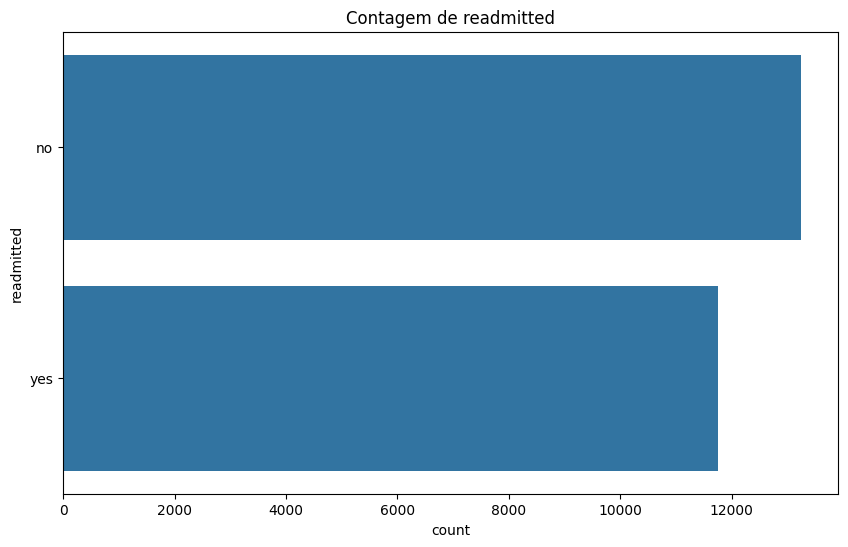

In [30]:
# Contagem de valores para variáveis categóricas
categorical_columns = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Contagem de {column}')
    plt.show()

###Mapa de Correlações

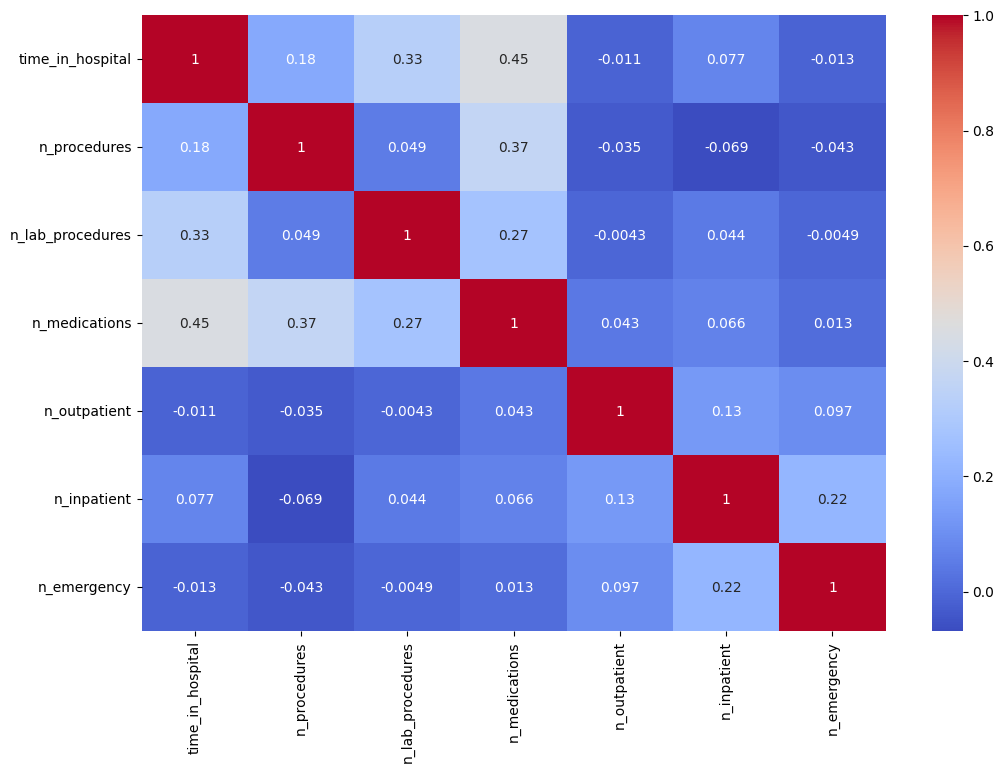

In [31]:
# Mapa de calor de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(df[['time_in_hospital', 'n_procedures', 'n_lab_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']].corr(), annot=True, cmap='coolwarm')
plt.show()

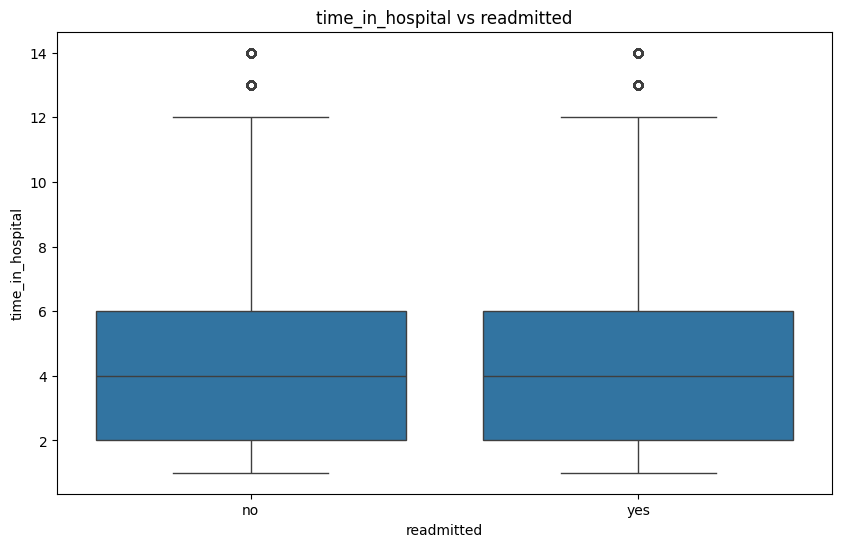

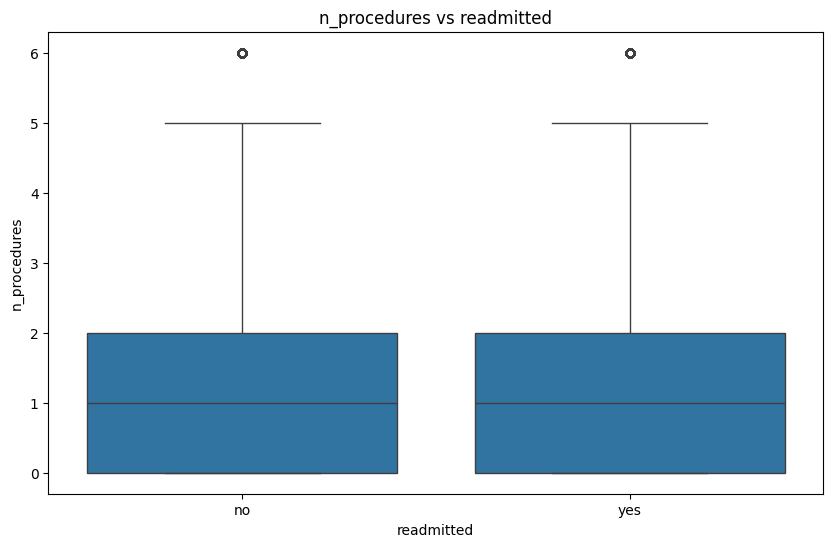

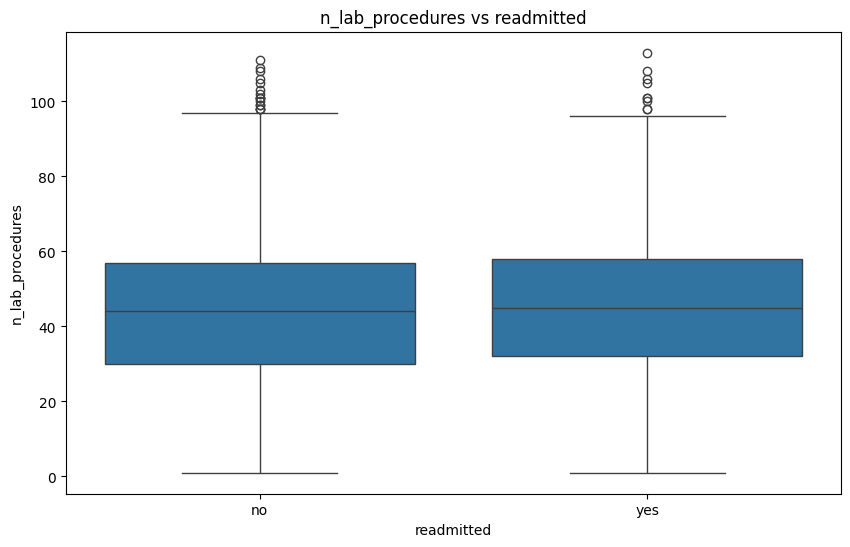

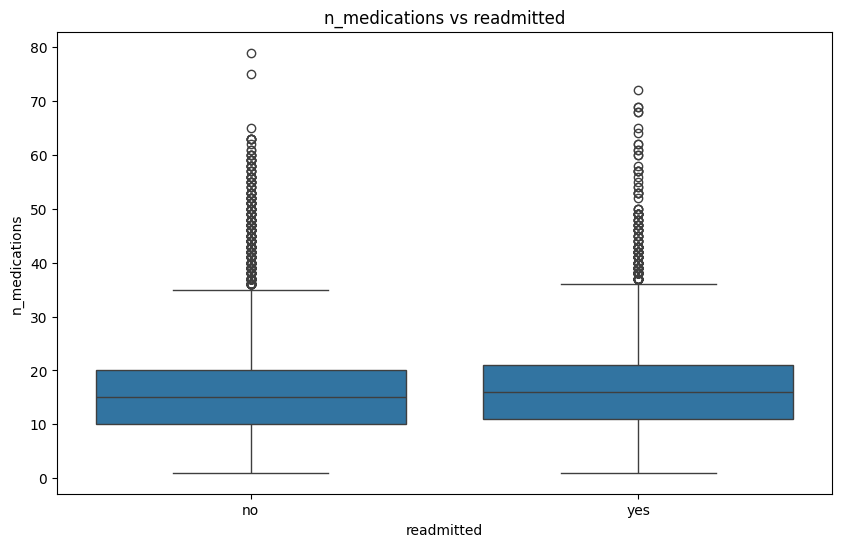

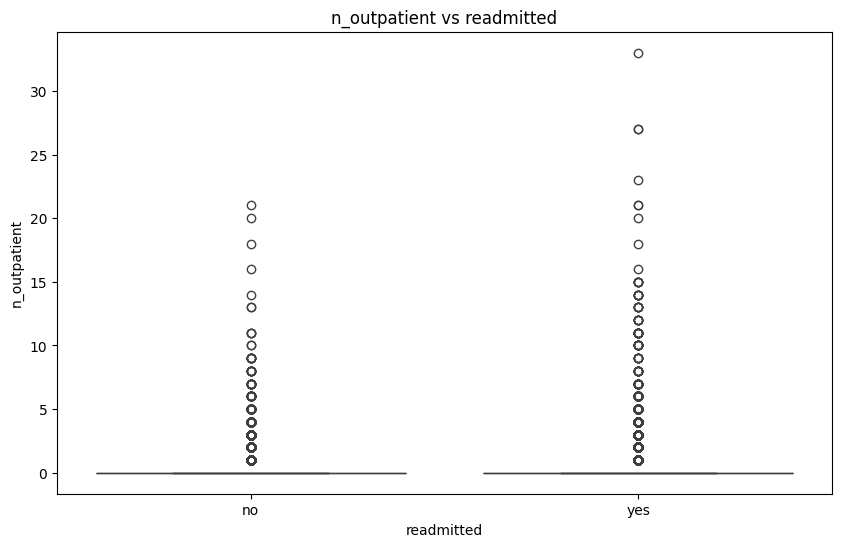

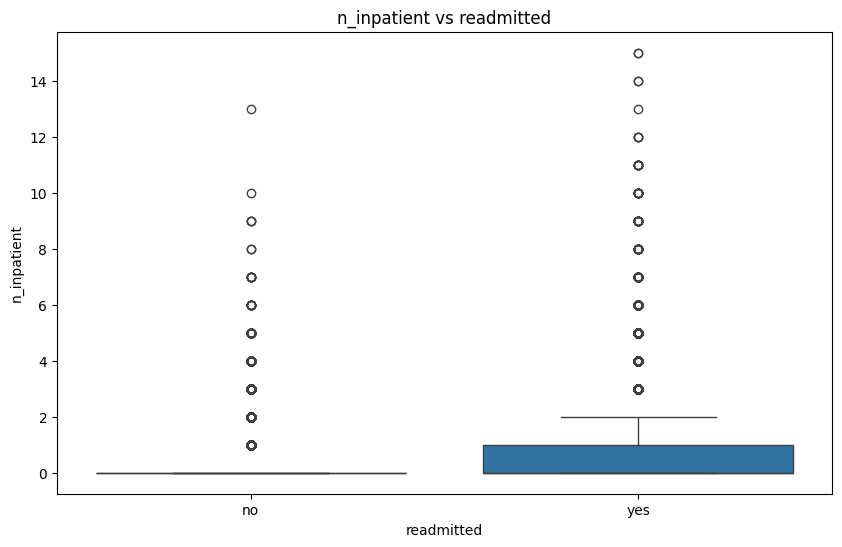

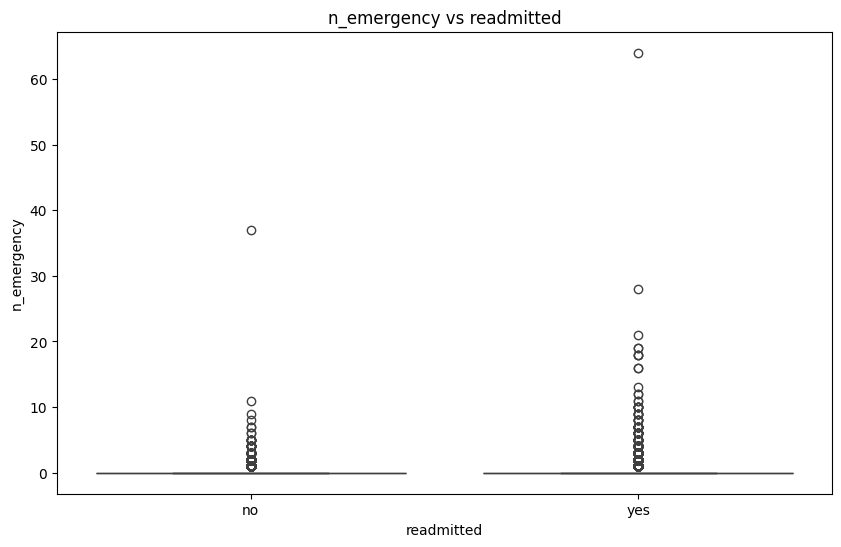

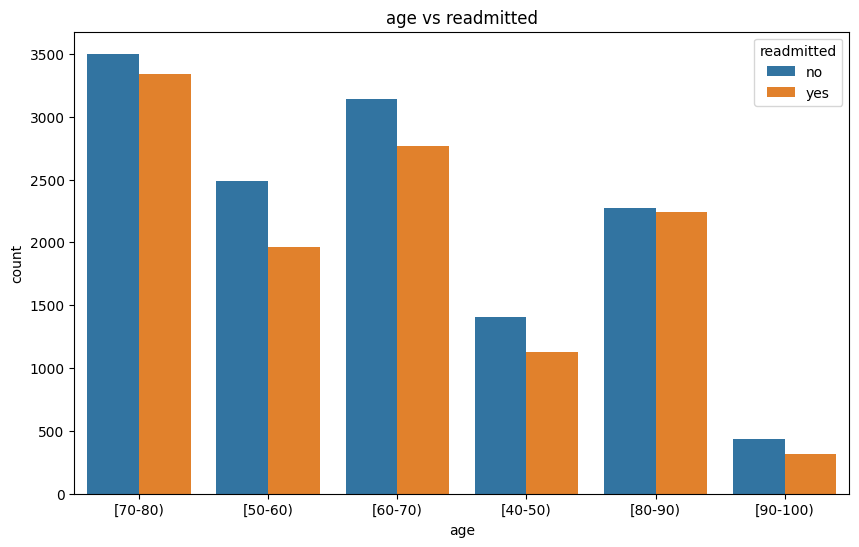

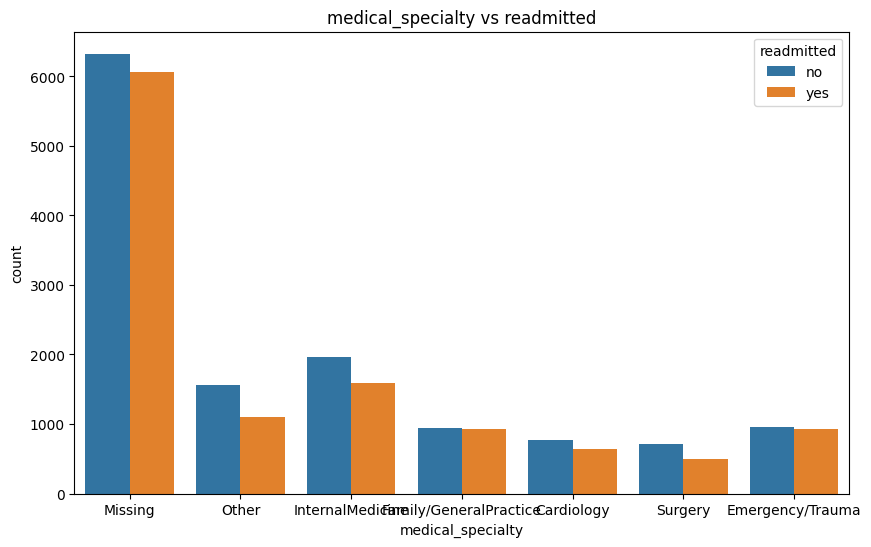

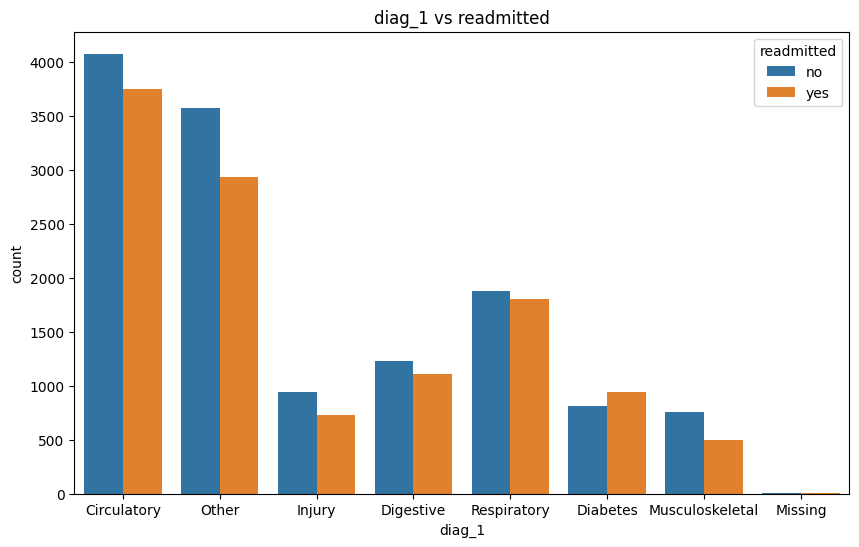

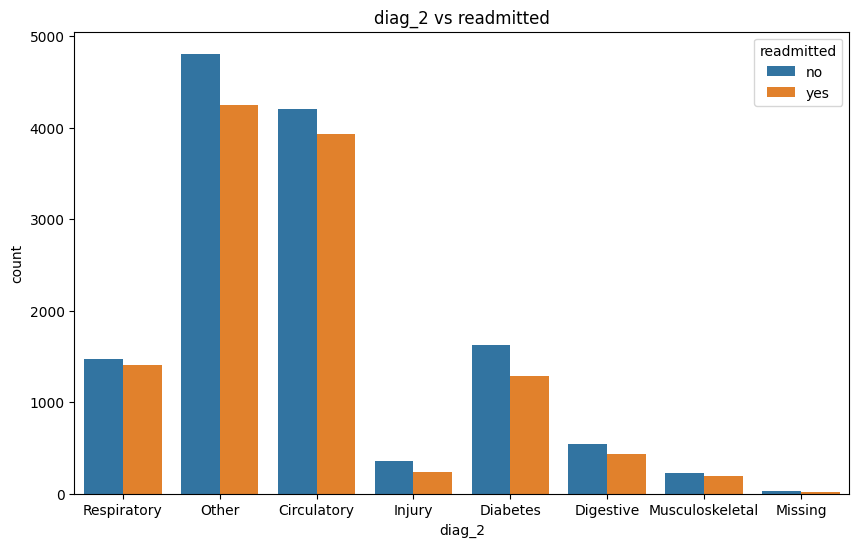

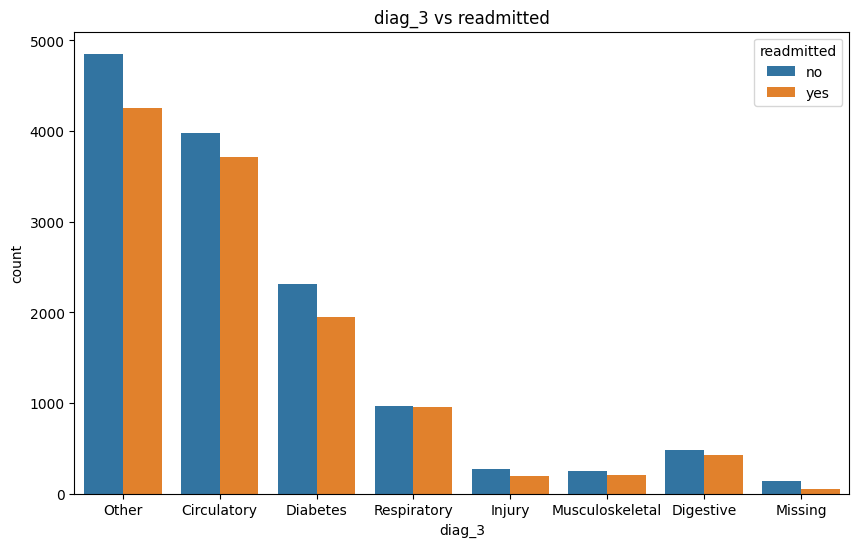

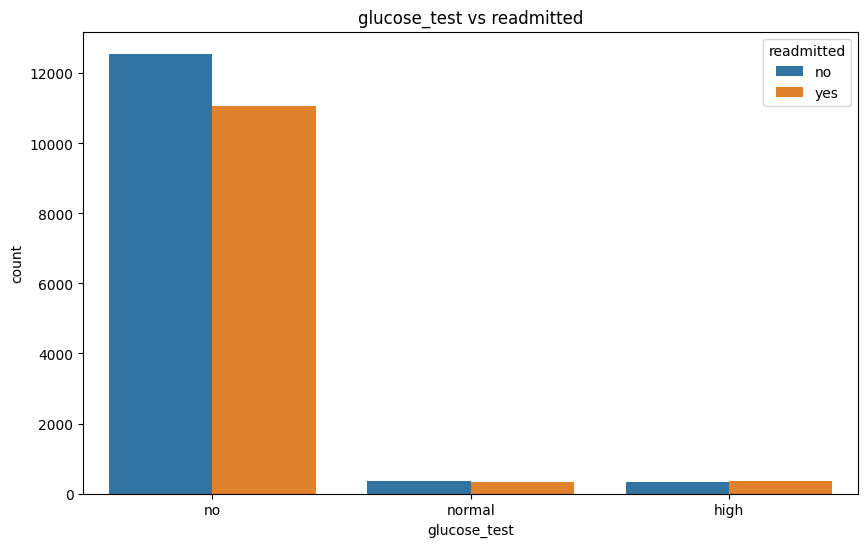

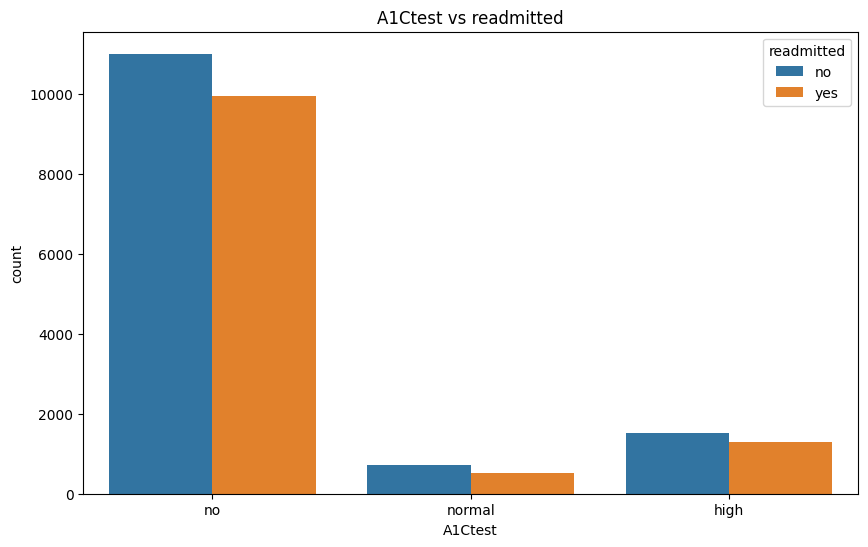

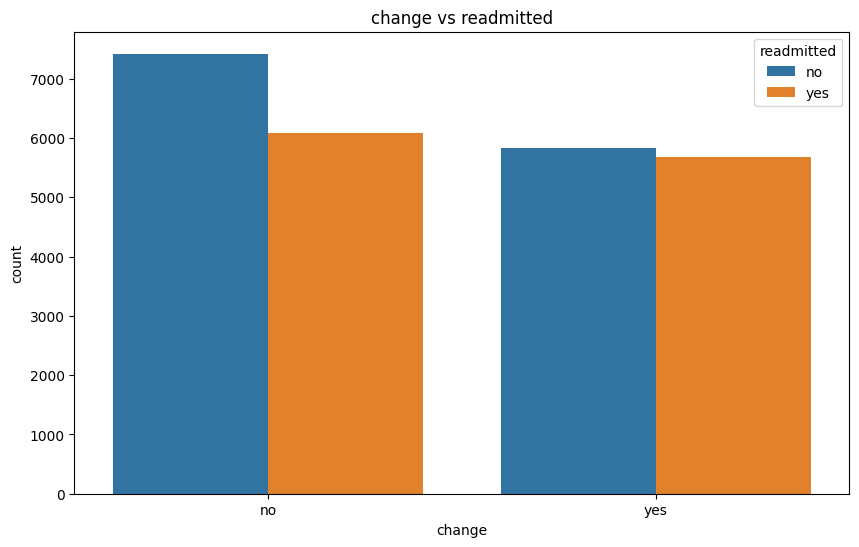

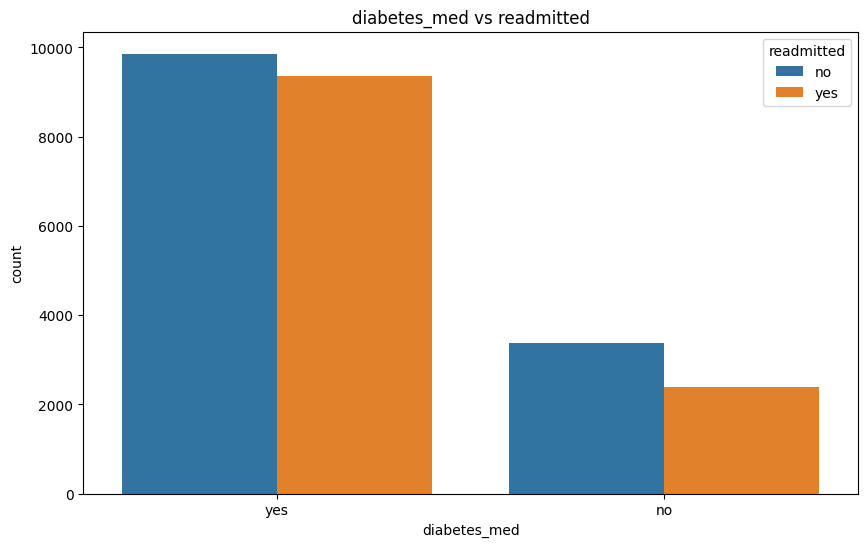

In [32]:
# Boxplots para variáveis numéricas vs readmitted
numerical_columns = ['time_in_hospital', 'n_procedures', 'n_lab_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='readmitted', y=column, data=df)
    plt.title(f'{column} vs readmitted')
    plt.show()

# Contagem de valores para variáveis categóricas vs readmitted
for column in categorical_columns:
    if column != 'readmitted':
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, hue='readmitted', data=df)
        plt.title(f'{column} vs readmitted')
        plt.show()

##Construção do modelo

In [33]:
# Preprocessamento de Dados
# Codificar a coluna 'age'
age_mapping = {
    '[0-10)': 0, '[10-20)': 1, '[20-30)': 2, '[30-40)': 3, '[40-50)': 4,
    '[50-60)': 5, '[60-70)': 6, '[70-80)': 7, '[80-90)': 8, '[90-100)': 9
}
df['age'] = df['age'].map(age_mapping)

# One-hot encoding para variáveis categóricas
df = pd.get_dummies(df, columns=['medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med'], drop_first=True)

# Codificar a variável alvo 'readmitted'
le = LabelEncoder()
df['readmitted'] = le.fit_transform(df['readmitted'])

# Separar features e target
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# Balanceamento dos dados com SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Normalização das variáveis numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# Treinamento e Avaliação dos Modelos
# Regressão Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
roc_auc_log = roc_auc_score(y_test, y_pred_log)
print(f'Regressão Logística - Acurácia: {accuracy_log}, ROC-AUC: {roc_auc_log}')

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print(f'Random Forest - Acurácia: {accuracy_rf}, ROC-AUC: {roc_auc_rf}')

# Support Vector Machine
svc = SVC(probability=True, random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
roc_auc_svc = roc_auc_score(y_test, y_pred_svc)
print(f'SVM - Acurácia: {accuracy_svc}, ROC-AUC: {roc_auc_svc}')

Regressão Logística - Acurácia: 0.6129458388375165, ROC-AUC: 0.6124712910092316
Random Forest - Acurácia: 0.6131345536893753, ROC-AUC: 0.6130372794489924
SVM - Acurácia: 0.6146442725042461, ROC-AUC: 0.614234431186604


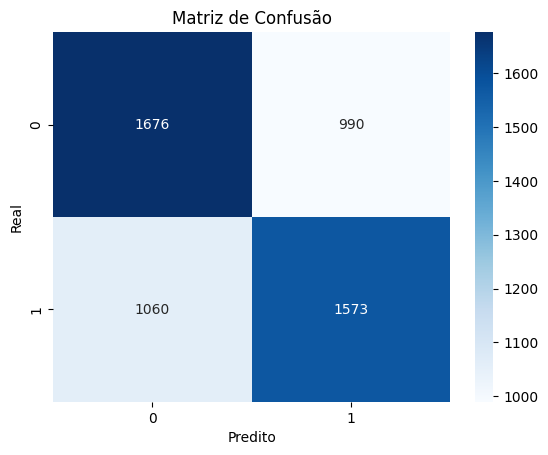

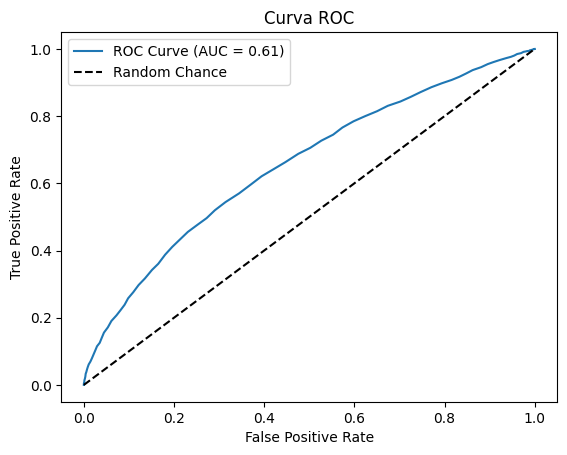

In [35]:
# Avaliação Final do Modelo
# Matriz de Confusão para o melhor modelo
best_model = rf
y_pred_best = y_pred_rf

cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# Curva ROC e AUC
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

#**Conclusão**

Nesse projeto tive como objetivo predizer as reinternações hospitalares, problema esse que causa custos adicionais às instituições de saúde além de piorar a qualidade de vida dos pacientes.

O projeto foi bem-sucedido em alcançar seus objetivos principais, que incluíam a exploração de dados, a construção de modelos preditivos e a avaliação de sua performance.

Foram testados três modelos de aprendizado de máquina: Regressão Logística, Random Forest e Support Vector Machine (SVM).

As métricas de avaliação mostraram que o modelo de Random Forest apresentou um desempenho superior em comparação aos outros, com uma acurácia e ROC-AUC que indicam uma boa capacidade de discriminar entre pacientes que seriam reinternados e aqueles que não seriam. A matriz de confusão e a curva ROC reforçam esses achados, mostrando um equilíbrio entre a sensibilidade e a especificidade do modelo.

O impacto prático deste projeto é significativo, uma vez que a implementação de um modelo preditivo eficiente pode ajudar a reduzir as taxas de reinternação, diminuir os custos hospitalares e melhorar a qualidade do atendimento ao paciente.